In [1]:
from __future__ import print_function
import ROOT as rt
from larflow import larflow
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Welcome to JupyROOT 6.14/02


In [2]:
rootfile = "test_detr2d.root"
tf = rt.TFile(rootfile)
tree = tf.Get("detr")
nentries = tree.GetEntries()

(4, 6)
   (257.0, 255.0) pid= 2212.0
   (236.0, 255.0) pid= 2212.0
   (255.0, 254.0) pid= 2212.0
   (209.0, 257.0) pid= 11.0
(4, 6)
   (256.0, 247.0) pid= 2212.0
   (236.0, 255.0) pid= 2212.0
   (255.0, 256.0) pid= 2212.0
   (213.0, 259.0) pid= 11.0
(4, 6)
   (257.0, 256.0) pid= 2212.0
   (236.0, 256.0) pid= 2212.0
   (255.0, 256.0) pid= 2212.0
   (213.0, 262.0) pid= 11.0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


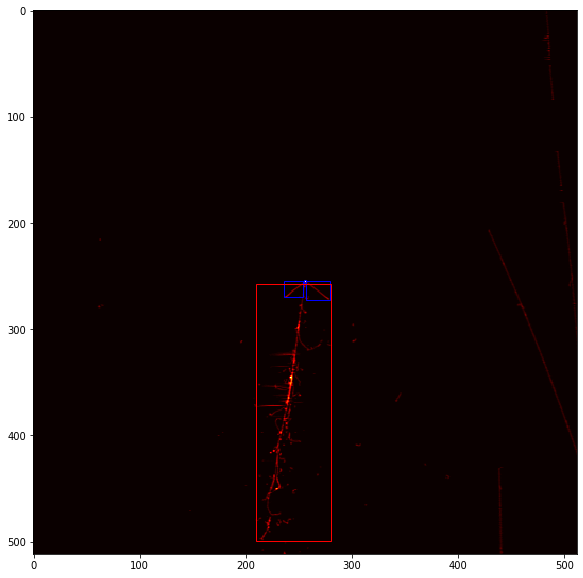

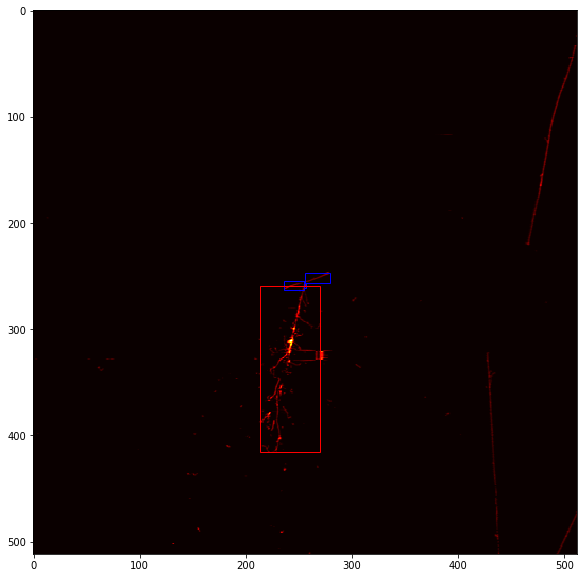

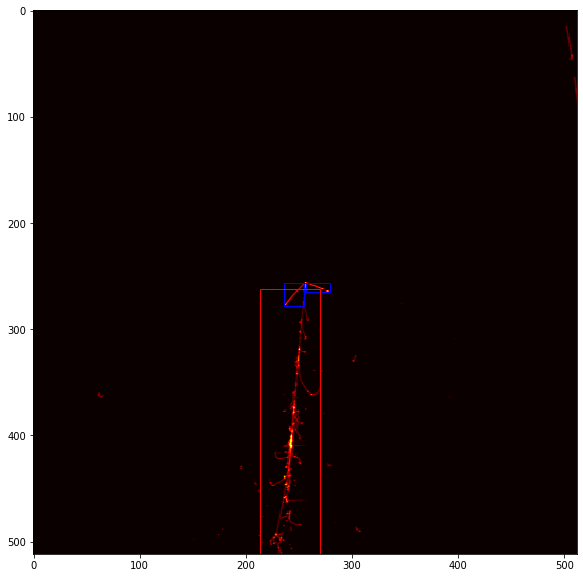

In [7]:
entry = 10
nbytes = tree.GetEntry(entry)

image_v = tree.image_v
nplanes = image_v.size()

bbox_v  = tree.bbox_v

for p in range(nplanes):
    fig, ax = plt.subplots(1,1,figsize=(10, 10))
    np_img = image_v[p].tonumpy()
    # note that data stored as (tick,wire) in order to keep wire-waveform contiguous
    
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    
    if bbox_v[p].ndims==0:
        continue
        
    np_bb  = bbox_v[p].tonumpy()
    print(np_bb.shape)
    
    # Create a Rectangle patch
    for i in range(np_bb.shape[0]):
        origin = (512*(np_bb[i,0]-np_bb[i,2]),512*(np_bb[i,1]-np_bb[i,3]) )
        pid = int(np_bb[i,4])
        if pid in [2112] or pid>1000000000:
            continue
        print("  ",origin,"pid=",np_bb[i,4])
        if int(np_bb[i,4]) in [-11,11,22]:
            color = 'r'
        else:
            color = 'b'
        rect = patches.Rectangle(origin, 2*np_bb[i,2]*512, 2*np_bb[i,3]*512, linewidth=1,
                                 edgecolor=color, facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    fig.show()
